# ML Clustering - Network Intrusion Detection
## Part 2 - DATA ANALYSIS

### 1. INITIALIZATION

In [1]:
# Import necessary libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Set display options
pd.set_option('display.max_columns', None)

### 2. LOADING DATASET

In [3]:
# Initialize required variables to read the cleaned data file
data_file_location = "..\\data\\processed\\"
data_file_name = "kddcup99_processed"
data_file_ext = ".csv"

# Read the dataset
data = pd.read_csv(data_file_location + data_file_name + data_file_ext, index_col=0)

In [4]:
# Check the dataset and its shape
data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_Combined,service_domain_u,service_ftp_data,service_http,service_other,service_private,service_smtp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.160834,-0.011424,1.224727,-0.002678,-0.001431,-0.002245,-0.053066,-0.007497,0.628588,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062316,-0.275102,-0.338329,-0.058013,-0.065329,-0.244239,-0.246728,0.160459,-0.157976,-0.478521,-1.439363,-2.319117,-2.759575,-0.313557,-0.480399,-0.479014,-0.070596,-0.057310,-0.256589,-0.255446,normal,-0.125797,0.518070,-0.49378,-0.191734,-0.250813,-0.201517,0.759514,-0.247958,-0.287893,-0.32906,-0.003649,-0.241131,-0.024841,-0.018666,-0.034730,-0.023263,-0.01252,-0.006865,0.247863,-0.001753
1,-0.160834,-0.011904,0.038174,-0.002678,-0.001431,-0.002245,-0.053066,-0.007497,0.628588,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062316,-0.243041,-0.307986,-0.058013,-0.065329,-0.244239,-0.246728,0.160459,-0.157976,-0.478521,-1.429694,-2.307635,0.508121,-0.313557,3.026552,-0.479014,-0.070596,-0.057310,-0.256589,-0.255446,normal,-0.125797,0.518070,-0.49378,-0.191734,-0.250813,-0.201517,0.759514,-0.247958,-0.287893,-0.32906,-0.003649,-0.241131,-0.024841,-0.018666,-0.034730,-0.023263,-0.01252,-0.006865,0.247863,-0.001753
2,-0.160834,-0.011234,-0.058394,-0.002678,-0.001431,-0.002245,-0.053066,-0.007497,0.628588,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062316,-0.275102,-0.338329,-0.058013,-0.065329,-0.244239,-0.246728,0.160459,-0.157976,-0.478521,-1.420025,-2.296152,0.508121,-0.313557,1.273077,-0.479014,-0.070596,-0.057310,-0.256589,-0.255446,normal,-0.125797,0.518070,-0.49378,-0.191734,-0.250813,-0.201517,0.759514,-0.247958,-0.287893,-0.32906,-0.003649,-0.241131,-0.024841,-0.018666,-0.034730,-0.023263,-0.01252,-0.006865,0.247863,-0.001753
3,-0.160834,-0.011261,-0.034866,-0.002678,-0.001431,-0.002245,-0.053066,-0.007497,0.628588,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062316,-0.243041,-0.307986,-0.058013,-0.065329,-0.244239,-0.246728,0.160459,-0.157976,-0.478521,-1.410356,-2.284669,0.508121,-0.313557,0.676895,-0.479014,-0.070596,-0.057310,-0.256589,-0.255446,normal,-0.125797,0.518070,-0.49378,-0.191734,-0.250813,-0.201517,0.759514,-0.247958,-0.287893,-0.32906,-0.003649,-0.241131,-0.024841,-0.018666,-0.034730,-0.023263,-0.01252,-0.006865,0.247863,-0.001753
4,-0.160834,-0.011206,-0.080107,-0.002678,-0.001431,-0.002245,-0.053066,-0.007497,0.628588,-0.004429,-0.017592,-0.010144,-0.00734,-0.021222,-0.018913,-0.06445,-0.001431,-0.062316,-0.210980,-0.277643,-0.058013,-0.065329,-0.244239,-0.246728,0.160459,-0.157976,-0.478521,-1.400687,-2.273186,0.508121,-0.313557,0.396339,-0.479014,-0.070596,-0.057310,-0.256589,-0.255446,normal,-0.125797,0.518070,-0.49378,-0.191734,-0.250813,-0.201517,0.759514,-0.247958,-0.287893,-0.32906,-0.003649,-0.241131,-0.024841,-0.018666,-0.034730,-0.023263,-0.01252,-0.006865,0.247863,-0.001753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976153,-0.160834,-0.004017,-0.094328,-0.002678,-0.001431,-0.002245,-0.053066,-0.007497,-1.590866,-0.004429,-0.017

As discussed in the previous phase, the dataset is now ready for analysis using PCA and KMeans clustering.

### 3. PRINCIPLE COMPONENT ANALYSIS (PCA)

The original dataset along with the performed preprocessing tasks has led to a relatively high number of variables, this may pose additional unnecessary overload during the clustering analysis. Specifically that some variables might not as much useful and may contain no relevant information to perform the clustering.

The goal of PCA is to convert the high dimensional data distribution into a lower, more compact space. Namely by calculating new variables (so called principle components) that represent the most important attributes in the original datasets.

Since the PCA includes distance-based calculations, our dataset was prepared by converting all attributes into a standardized version, maintaining the value distribution in a normalized scale.

*One last note, PCA is primarily designed to work with numerical (quantitative) variables. At the same time, our dataset has categorical features which were encoded into binary vectors. This might not suitably fit the use case of PCA and there are many discussions regarding the applicability of PCA on categorical (qualitative) features. However, since the main objective of this project is to demonstrate some experiments of several data analysis techniques/algorithms, we will proceed with PCA keeping in mind that in more realistic scenarios a deeper analysis will be definitely recommended.*

In [5]:
# Since the original dataset contains a label class, we will disregard it in our dataset and keep it in a separate variable for later assessment.
labels = data["labels"]
data.drop("labels", axis="columns", inplace=True)

In [7]:
pca = PCA()
pca_data = pca.fit_transform(data)
print(len(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)


57
[1.20574059e-01 1.03848634e-01 7.06328892e-02 5.15988706e-02
 4.33453328e-02 4.17786093e-02 3.52853573e-02 3.07073993e-02
 2.81370177e-02 2.42414101e-02 2.22278497e-02 2.09811701e-02
 2.08348635e-02 2.04699071e-02 1.88800817e-02 1.81301610e-02
 1.80572964e-02 1.78690198e-02 1.76323716e-02 1.75505707e-02
 1.75450229e-02 1.75416497e-02 1.75108732e-02 1.72852525e-02
 1.72402822e-02 1.69501043e-02 1.68715826e-02 1.64930235e-02
 1.50857047e-02 1.39900056e-02 1.36814715e-02 1.11966800e-02
 9.27023910e-03 8.61428737e-03 8.15658233e-03 7.77563108e-03
 5.17309533e-03 4.08473583e-03 3.79955336e-03 3.21355937e-03
 3.10300322e-03 2.48349306e-03 1.98181260e-03 1.65986437e-03
 1.40291629e-03 1.29977291e-03 1.20720377e-03 7.85511926e-04
 6.30824170e-04 5.96724343e-04 2.98650110e-04 2.12612609e-04
 4.52773797e-05 3.01253242e-05 5.47515664e-32 4.91824045e-32
 8.92487629e-33]


In [115]:
pca_results.shape

(976158, 10)

In [116]:
ddd = pd.DataFrame(pca_results, columns=pca.get_feature_names_out(), index=data.index)

ValueError: Shape of passed values is (976158, 10), indices imply (100655, 10)

In [100]:
ddd

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,-0.529482,-0.111788,0.090610,1.878402,0.309451,0.682281,-0.622136,0.225602,-0.466434,-0.069748
1,-0.179824,-0.003807,-0.139148,1.272017,0.304405,0.945740,-0.935819,-0.745960,-0.049104,-0.315758
2,-0.066012,-0.478812,-0.062932,1.174327,0.275850,0.630495,-0.690934,-0.356943,-0.023424,-0.161581
3,-0.030377,-0.644818,-0.031909,1.113424,0.249176,0.547299,-0.611275,-0.243413,-0.026362,-0.110613
4,-0.014944,-0.723895,-0.016936,1.069909,0.228471,0.511340,-0.580304,-0.196453,-0.030096,-0.089908
...,...,...,...,...,...,...,...,...,...,...
976153,-3.006656,1.407454,1.157792,-15.653608,-11.078647,14.428142,-6.802049,-4.991114,-5.031935,-1.368847
976154,-3.008821,1.406249,1.160838,-15.673800,-11.092106,14.444067,-6.808768,-5.003372,-5.041470,-1.371953
976155,5.700114,8.266409,1.507272,-2.257508,-1.880841,1.385641,-0.976942,1.688824,2.505416,0.746769
976156,-3.008821,1.406249,1.160838,-15.673800,-11.092106,14.444067,-6.808768,-5.003372,-5.041470,-1.371953


In [117]:
kmeans = KMeans(n_clusters=9).fit(data)
kmeans.labels_

c:\Users\SinanWannous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, ..., 4, 5, 4])

In [118]:
len([x for x in kmeans.labels_ if x == 0])

56607

In [119]:
data["cluster"] = kmeans.labels_
data["label"] = labels

<Axes: xlabel='pca1', ylabel='pca2'>

c:\Users\SinanWannous\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

c:\Users\SinanWannous\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



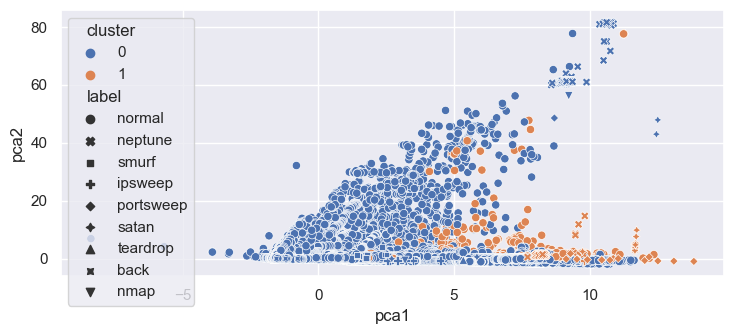

In [85]:
sns.scatterplot(data=ddd, x="pca1", y="pca2", hue="cluster", style="label")